In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
print("Data Shape:",data.shape)
print(data.head())

Data Shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.25,random_state=42,stratify=y)

In [7]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [8]:
k_values=range(1,21)
accuracies=[]

In [10]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled,y_train)
    y_pred=knn.predict(x_test_scaled)
    acc=accuracy_score(y_test,y_pred)
    accuracies.append(acc)

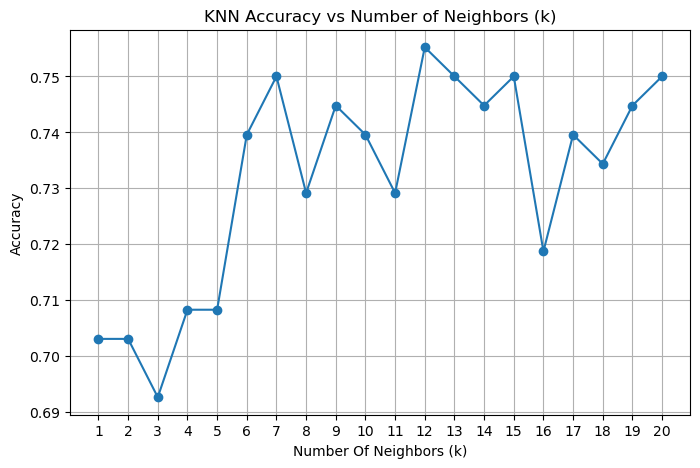

In [14]:
plt.figure(figsize=(8,5))
plt.plot(k_values,accuracies,marker='o',linestyle='-')
plt.title("KNN Accuracy vs Number of Neighbors (k)")
plt.xlabel("Number Of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [15]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=12)

In [16]:
y_pred = knn.predict(x_test_scaled)

In [17]:
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nAccuracy:\n",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))



Confusion Matrix:
 [[111  14]
 [ 33  34]]

Accuracy:
 0.7552083333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       125
           1       0.71      0.51      0.59        67

    accuracy                           0.76       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.75      0.76      0.74       192

